In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_theme(style="whitegrid")

# Ejercicio 1
## Descripción:
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.
## Dataset:
El dataset proporcionado incluye las siguientes variables para cada estudiante:
* Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
* Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
* Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
* Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
* Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
Además, el dataset incluye la variable objetivo:
* Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.
## Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.


## Carga de CSV y análisis

In [2]:
df = pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

No hay valores nulos

<Figure size 640x480 with 0 Axes>

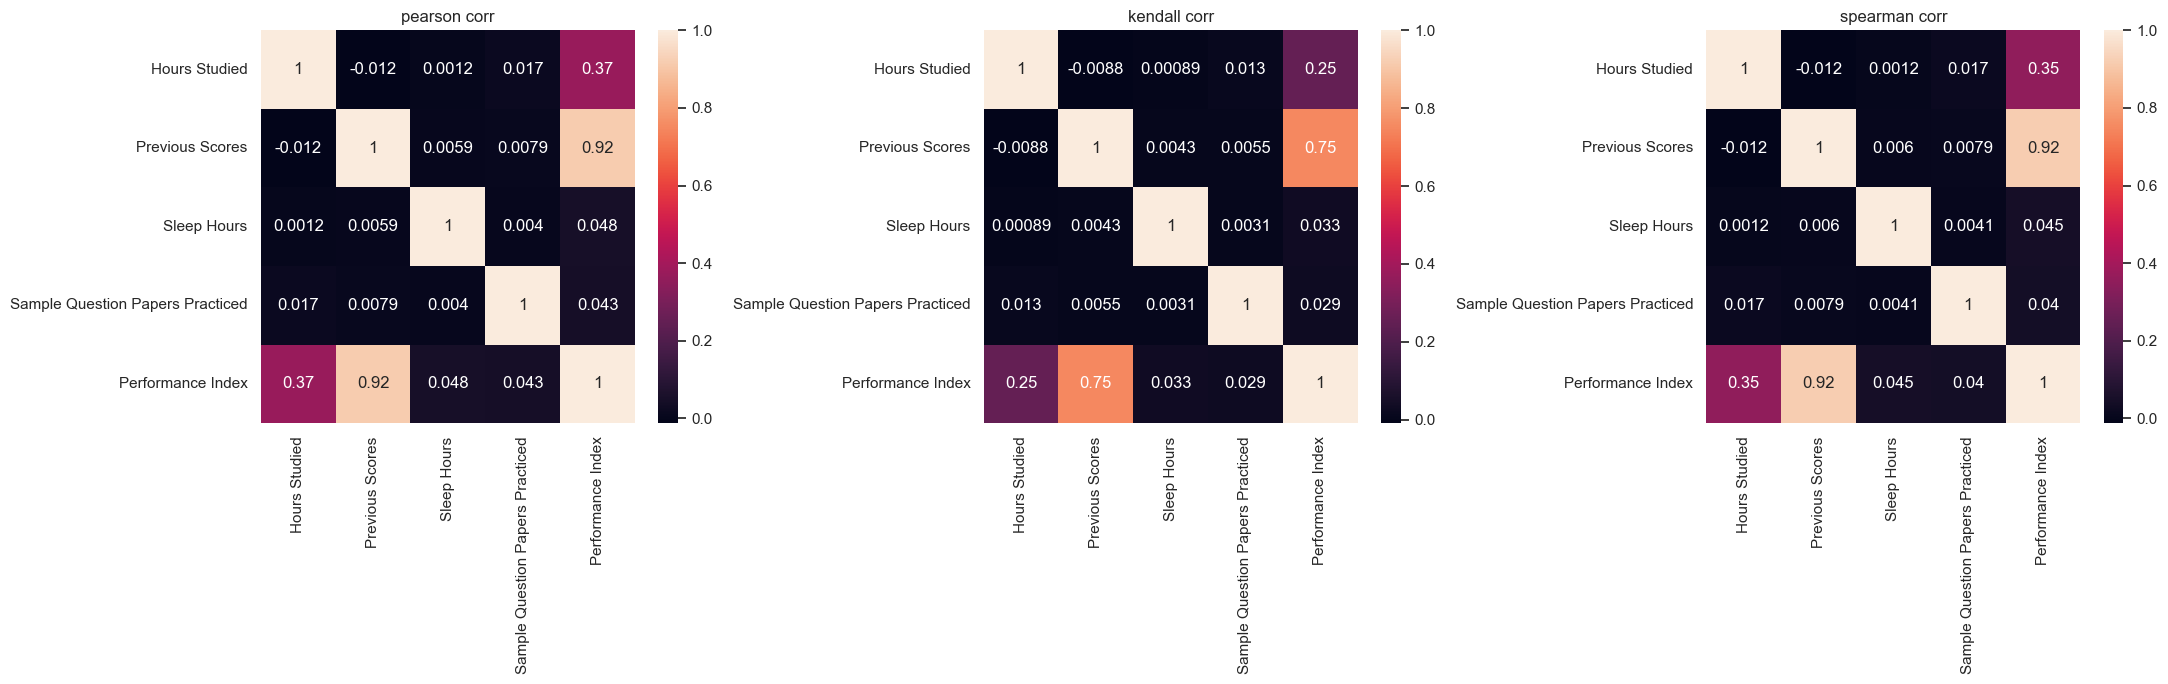

In [7]:
methods = ["pearson", "kendall", "spearman"]
plt.figure()
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
for i, method in enumerate(methods):
    sbn.heatmap(df.corr(numeric_only=True, method=method), ax=axes[i], annot=True)
    axes[i].set_title(f"{method} corr")
plt.tight_layout()
plt.show()

Vemos que las variables descriptivas que más van a servir para realizar la predicción de *Performance Index* son **Hours Studied** y **Previous Scores**

/home/simon/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/simon/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

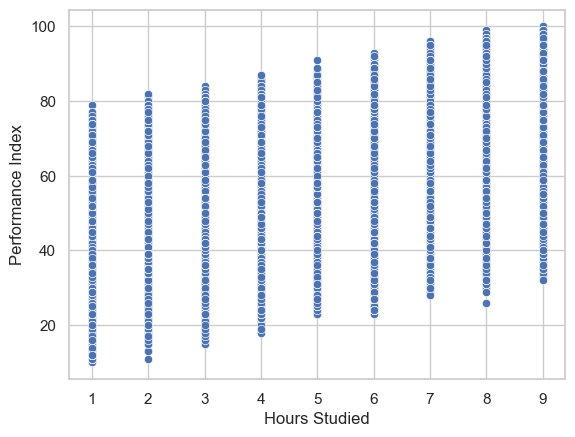

In [8]:
sbn.scatterplot(df, x="Hours Studied", y="Performance Index")

/home/simon/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/simon/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

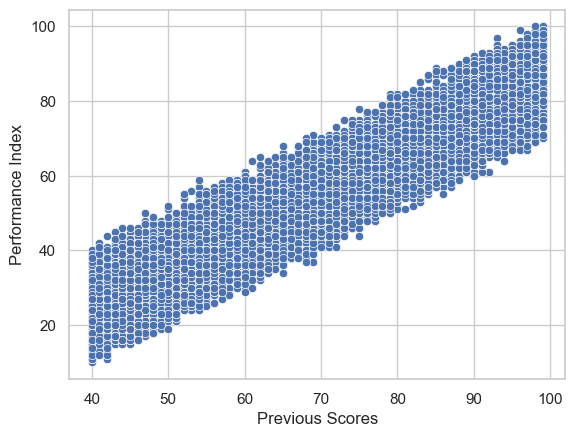

In [9]:
sbn.scatterplot(df, x="Previous Scores", y="Performance Index")

In [10]:
#Convertir variables categóricas a numéricas
df2 = df.copy()
df2["IsExtraAct"] = df["Extracurricular Activities"].apply(lambda x: 1 if x == 'Yes' else 0)
df2.drop(columns="Extracurricular Activities", inplace=True)

In [11]:
df2.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,IsExtraAct
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


## Creación del modelo

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
import tensorflow as tf
from sklearn.model_selection import train_test_split
import optuna
import os
import random

def set_seeds(seed):  #Setear seed para obtener siempre los mismos resultados
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    keras.utils.set_random_seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
set_seeds(72)

2024-05-06 22:57:22.031849: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 22:57:22.031873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 22:57:22.032525: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 22:57:22.036387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 22:57:22.603995: W tensorflow/compiler/tf2

In [13]:
## Dividir dataset
#Se elimina la columna target
dfx = df2.drop(columns=["Performance Index"])
dfy = df2["Performance Index"]
X, X_test, y, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=72)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=72)

#### Fine-Tunning
Utilizamos la librería optuna para encontrar los mejores parámetros para el modelo.
Para ello necesitamos una función en donde vamos a definir nuestros posibles parámetros y luego retornamos el RMSE. El propósito es minimizar la función para quedarnos con el modelo que tenga el menor RMSE

In [14]:
def objetivo_regresion(trial: optuna.trial.Trial):
    num_capas = trial.suggest_int("num_capas", 1, 4)
    model = Sequential()
    model.add(Input(shape=(len(X_train.columns), )))
    for i in range(num_capas):
        num_conexiones = trial.suggest_int(f"n_por_capas_{i}", 2, 10)
        model.add(Dense(num_conexiones, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse", metrics=[keras.metrics.RootMeanSquaredError(name="rmse")])
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=32)
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]

In [15]:
estudio_reg = optuna.create_study(direction="minimize")
estudio_reg.optimize(objetivo_regresion, n_trials=10)

[I 2024-05-06 22:57:23,187] A new study created in memory with name: no-name-c594a22a-cae3-4b77-981f-268550e7175f
2024-05-06 22:57:23.220163: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-06 22:57:23.240238: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-06 22:57:23.240365: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUM

Epoch 1/10


2024-05-06 22:57:23.949524: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-06 22:57:24.206971: I external/local_xla/xla/service/service.cc:168] XLA service 0x56269cc6fd90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-06 22:57:24.206993: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2024-05-06 22:57:24.210857: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-06 22:57:24.221440: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1715047044.282666   33022 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 [==============================] - 2s 2ms/step - loss: 3395.6367 - rmse: 58.2721 - val_loss: 3402.3669 - val_rmse: 58.3298
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 3375.0454 - rmse: 58.0951 - val_loss: 3381.7754 - val_rmse: 58.1530
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 3354.5322 - rmse: 57.9183 - val_loss: 3361.2251 - val_rmse: 57.9761
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 3334.1274 - rmse: 57.7419 - val_loss: 3340.7930 - val_rmse: 57.7996
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 3313.8616 - rmse: 57.5662 - val_loss: 3320.4905 - val_rmse: 57.6237
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 3293.6831 - rmse: 57.3906 - val_loss: 3300.2734 - val_rmse: 57.4480
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 3273.5813 - rmse: 57.2152 - val_loss: 3280.1252 - val_rmse: 57.2724
Epoch 8/10
188/18

[I 2024-05-06 22:57:27,991] Trial 0 finished with value: 57.008033752441406 and parameters: {'num_capas': 3, 'n_por_capas_0': 4, 'n_por_capas_1': 8, 'n_por_capas_2': 6}. Best is trial 0 with value: 57.008033752441406.


Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 189.5808 - rmse: 13.7688 - val_loss: 74.8037 - val_rmse: 8.6489
Epoch 2/10
188/188 [==============================] - 0s 1ms/step - loss: 79.1044 - rmse: 8.8941 - val_loss: 68.2242 - val_rmse: 8.2598
Epoch 3/10
188/188 [==============================] - 0s 1ms/step - loss: 71.1759 - rmse: 8.4366 - val_loss: 60.8532 - val_rmse: 7.8008
Epoch 4/10
188/188 [==============================] - 0s 1ms/step - loss: 62.7339 - rmse: 7.9205 - val_loss: 52.7997 - val_rmse: 7.2663
Epoch 5/10
188/188 [==============================] - 0s 1ms/step - loss: 53.8916 - rmse: 7.3411 - val_loss: 45.1218 - val_rmse: 6.7173
Epoch 6/10
188/188 [==============================] - 0s 1ms/step - loss: 45.3535 - rmse: 6.7345 - val_loss: 37.8299 - val_rmse: 6.1506
Epoch 7/10
188/188 [==============================] - 0s 1ms/step - loss: 36.3653 - rmse: 6.0304 - val_loss: 30.2493 - val_rmse: 5.4999
Epoch 8/10
188/188 [==========================

[I 2024-05-06 22:57:31,508] Trial 1 finished with value: 4.861639499664307 and parameters: {'num_capas': 2, 'n_por_capas_0': 7, 'n_por_capas_1': 7}. Best is trial 1 with value: 4.861639499664307.


Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 1498.8285 - rmse: 38.7147 - val_loss: 257.4782 - val_rmse: 16.0461
Epoch 2/10
188/188 [==============================] - 0s 1ms/step - loss: 105.0544 - rmse: 10.2496 - val_loss: 56.9422 - val_rmse: 7.5460
Epoch 3/10
188/188 [==============================] - 0s 1ms/step - loss: 59.4586 - rmse: 7.7109 - val_loss: 54.9847 - val_rmse: 7.4152
Epoch 4/10
188/188 [==============================] - 0s 1ms/step - loss: 58.3320 - rmse: 7.6375 - val_loss: 53.7366 - val_rmse: 7.3305
Epoch 5/10
188/188 [==============================] - 0s 1ms/step - loss: 56.9916 - rmse: 7.5493 - val_loss: 52.3996 - val_rmse: 7.2388
Epoch 6/10
188/188 [==============================] - 0s 1ms/step - loss: 55.5205 - rmse: 7.4512 - val_loss: 51.0042 - val_rmse: 7.1417
Epoch 7/10
188/188 [==============================] - 0s 1ms/step - loss: 53.9866 - rmse: 7.3476 - val_loss: 49.4719 - val_rmse: 7.0336
Epoch 8/10
188/188 [=====================

[I 2024-05-06 22:57:34,598] Trial 2 finished with value: 6.8993377685546875 and parameters: {'num_capas': 1, 'n_por_capas_0': 7}. Best is trial 1 with value: 4.861639499664307.


Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 2422.4048 - rmse: 49.2179 - val_loss: 1040.9373 - val_rmse: 32.2636
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 254.0896 - rmse: 15.9402 - val_loss: 64.4948 - val_rmse: 8.0309
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 69.1622 - rmse: 8.3164 - val_loss: 63.1334 - val_rmse: 7.9457
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 67.4771 - rmse: 8.2144 - val_loss: 61.0395 - val_rmse: 7.8128
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 65.2656 - rmse: 8.0787 - val_loss: 58.7626 - val_rmse: 7.6657
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 62.8087 - rmse: 7.9252 - val_loss: 56.5498 - val_rmse: 7.5200
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 60.2822 - rmse: 7.7642 - val_loss: 53.8989 - val_rmse: 7.3416
Epoch 8/10
188/188 [====================

[I 2024-05-06 22:57:38,544] Trial 3 finished with value: 7.025221824645996 and parameters: {'num_capas': 3, 'n_por_capas_0': 4, 'n_por_capas_1': 6, 'n_por_capas_2': 6}. Best is trial 1 with value: 4.861639499664307.


Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 1165.3621 - rmse: 34.1374 - val_loss: 56.0066 - val_rmse: 7.4838
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 56.5974 - rmse: 7.5231 - val_loss: 52.5052 - val_rmse: 7.2460
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 50.2033 - rmse: 7.0854 - val_loss: 43.4549 - val_rmse: 6.5920
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 42.5190 - rmse: 6.5207 - val_loss: 37.5110 - val_rmse: 6.1246
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 37.5413 - rmse: 6.1271 - val_loss: 33.7787 - val_rmse: 5.8119
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 34.1827 - rmse: 5.8466 - val_loss: 31.4935 - val_rmse: 5.6119
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 32.1837 - rmse: 5.6731 - val_loss: 30.1447 - val_rmse: 5.4904
Epoch 8/10
188/188 [=========================

[I 2024-05-06 22:57:42,666] Trial 4 finished with value: 5.328561782836914 and parameters: {'num_capas': 3, 'n_por_capas_0': 9, 'n_por_capas_1': 6, 'n_por_capas_2': 8}. Best is trial 1 with value: 4.861639499664307.


Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 3395.6367 - rmse: 58.2721 - val_loss: 3402.3669 - val_rmse: 58.3298
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 3375.0454 - rmse: 58.0951 - val_loss: 3381.7754 - val_rmse: 58.1530
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 3354.5322 - rmse: 57.9183 - val_loss: 3361.2251 - val_rmse: 57.9761
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 3334.1274 - rmse: 57.7419 - val_loss: 3340.7930 - val_rmse: 57.7996
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 3313.8616 - rmse: 57.5662 - val_loss: 3320.4905 - val_rmse: 57.6237
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 3293.6831 - rmse: 57.3906 - val_loss: 3300.2734 - val_rmse: 57.4480
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 3273.5813 - rmse: 57.2152 - val_loss: 3280.1252 - val_rmse: 57.2724
Epoch 

[I 2024-05-06 22:57:47,374] Trial 5 finished with value: 57.008033752441406 and parameters: {'num_capas': 4, 'n_por_capas_0': 3, 'n_por_capas_1': 3, 'n_por_capas_2': 7, 'n_por_capas_3': 2}. Best is trial 1 with value: 4.861639499664307.


Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 3395.6367 - rmse: 58.2721 - val_loss: 3402.3669 - val_rmse: 58.3298
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 3375.0454 - rmse: 58.0951 - val_loss: 3381.7754 - val_rmse: 58.1530
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 3354.5322 - rmse: 57.9183 - val_loss: 3361.2251 - val_rmse: 57.9761
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 3334.1274 - rmse: 57.7419 - val_loss: 3340.7930 - val_rmse: 57.7996
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 3313.8616 - rmse: 57.5662 - val_loss: 3320.4905 - val_rmse: 57.6237
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 3293.6831 - rmse: 57.3906 - val_loss: 3300.2734 - val_rmse: 57.4480
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 3273.5813 - rmse: 57.2152 - val_loss: 3280.1252 - val_rmse: 57.2724
Epoch 

[I 2024-05-06 22:57:51,786] Trial 6 finished with value: 57.008033752441406 and parameters: {'num_capas': 4, 'n_por_capas_0': 7, 'n_por_capas_1': 7, 'n_por_capas_2': 3, 'n_por_capas_3': 2}. Best is trial 1 with value: 4.861639499664307.


Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 1909.4185 - rmse: 43.6969 - val_loss: 692.9985 - val_rmse: 26.3249
Epoch 2/10
188/188 [==============================] - 0s 1ms/step - loss: 220.8858 - rmse: 14.8622 - val_loss: 68.4940 - val_rmse: 8.2761
Epoch 3/10
188/188 [==============================] - 0s 1ms/step - loss: 69.3294 - rmse: 8.3264 - val_loss: 63.9341 - val_rmse: 7.9959
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 67.0889 - rmse: 8.1908 - val_loss: 61.9959 - val_rmse: 7.8737
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 65.5071 - rmse: 8.0936 - val_loss: 60.5075 - val_rmse: 7.7787
Epoch 6/10
188/188 [==============================] - 0s 1ms/step - loss: 63.9061 - rmse: 7.9941 - val_loss: 59.0057 - val_rmse: 7.6815
Epoch 7/10
188/188 [==============================] - 0s 1ms/step - loss: 62.2040 - rmse: 7.8870 - val_loss: 57.1465 - val_rmse: 7.5595
Epoch 8/10
188/188 [=====================

[I 2024-05-06 22:57:55,423] Trial 7 finished with value: 7.310590744018555 and parameters: {'num_capas': 2, 'n_por_capas_0': 6, 'n_por_capas_1': 5}. Best is trial 1 with value: 4.861639499664307.


Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 870.7096 - rmse: 29.5078 - val_loss: 73.2256 - val_rmse: 8.5572
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 78.5726 - rmse: 8.8641 - val_loss: 69.8672 - val_rmse: 8.3587
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 74.5675 - rmse: 8.6352 - val_loss: 66.1346 - val_rmse: 8.1323
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 70.3791 - rmse: 8.3892 - val_loss: 61.9099 - val_rmse: 7.8683
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 65.8385 - rmse: 8.1141 - val_loss: 57.6921 - val_rmse: 7.5955
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 61.1973 - rmse: 7.8229 - val_loss: 53.6352 - val_rmse: 7.3236
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 56.4506 - rmse: 7.5134 - val_loss: 49.4716 - val_rmse: 7.0336
Epoch 8/10
188/188 [==========================

[I 2024-05-06 22:57:59,262] Trial 8 finished with value: 6.383946895599365 and parameters: {'num_capas': 3, 'n_por_capas_0': 7, 'n_por_capas_1': 3, 'n_por_capas_2': 7}. Best is trial 1 with value: 4.861639499664307.


Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 486.2133 - rmse: 22.0502 - val_loss: 92.6322 - val_rmse: 9.6246
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 97.1694 - rmse: 9.8575 - val_loss: 82.2412 - val_rmse: 9.0687
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 76.3179 - rmse: 8.7360 - val_loss: 60.7970 - val_rmse: 7.7972
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 56.5027 - rmse: 7.5168 - val_loss: 45.0489 - val_rmse: 6.7118
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 42.9723 - rmse: 6.5553 - val_loss: 35.8710 - val_rmse: 5.9892
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 35.0143 - rmse: 5.9173 - val_loss: 30.9189 - val_rmse: 5.5605
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 30.7235 - rmse: 5.5429 - val_loss: 28.1339 - val_rmse: 5.3041
Epoch 8/10
188/188 [==========================

[I 2024-05-06 22:58:03,141] Trial 9 finished with value: 4.975692272186279 and parameters: {'num_capas': 3, 'n_por_capas_0': 4, 'n_por_capas_1': 4, 'n_por_capas_2': 9}. Best is trial 1 with value: 4.861639499664307.


In [16]:
estudio_reg.best_params

{'num_capas': 2, 'n_por_capas_0': 7, 'n_por_capas_1': 7}

In [17]:
estudio_reg.best_value

4.861639499664307

Utilizando **optuna** logramos un fine-tunning del modelo y obtuvimos los siguientes resultados:

**MODELO:**
* Número de capas: 1
* Neuronas capa 1: 7
  
**Mínimo RMSE:** 5.31

#### Creación del modelo

In [18]:
model = Sequential()
model.add(Input(shape=(len(X_train.columns), )))
model.add(Dense(units=7, activation="relu"))
model.add(Dense(units=1))
model.compile(optimizer="adam", loss="mse", metrics=[keras.metrics.RootMeanSquaredError(name="rmse")])

In [19]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 7)                 42        
                                                                 
 dense_39 (Dense)            (None, 1)                 8         
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=32)
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
188/188 [==============================] - 1s 2ms/step - loss: 218.5481 - rmse: 14.7834 - val_loss: 59.3547 - val_rmse: 7.7042
Epoch 2/10
188/188 [==============================] - 0s 1ms/step - loss: 59.6353 - rmse: 7.7224 - val_loss: 53.9856 - val_rmse: 7.3475
Epoch 3/10
188/188 [==============================] - 0s 1ms/step - loss: 53.8383 - rmse: 7.3375 - val_loss: 48.3709 - val_rmse: 6.9549
Epoch 4/10
188/188 [==============================] - 0s 1ms/step - loss: 48.4545 - rmse: 6.9609 - val_loss: 43.1830 - val_rmse: 6.5714
Epoch 5/10
188/188 [==============================] - 0s 1ms/step - loss: 43.6524 - rmse: 6.6070 - val_loss: 39.0543 - val_rmse: 6.2493
Epoch 6/10
188/188 [==============================] - 0s 1ms/step - loss: 39.7609 - rmse: 6.3056 - val_loss: 35.9297 - val_rmse: 5.9941
Epoch 7/10
188/188 [==============================] - 0s 1ms/step - loss: 36.7658 - rmse: 6.0635 - val_loss: 33.6278 - val_rmse: 5.7990
Epoch 8/10
188/188 [==========================

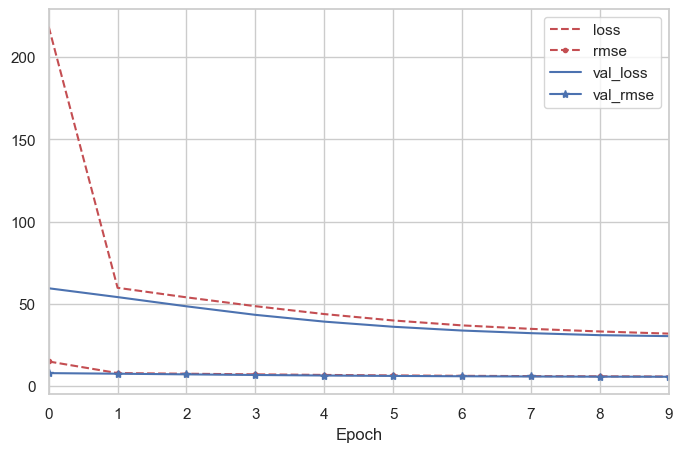

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5), xlim=[0, 9],  grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()

Podemos ver que los valores de función de pérdida son más grandes a los de la pérdida de validación. Tambien vemos que los valores de RMSE, tanto para training como validation no van cambiando a lo largo del tiempo ya que desde la primer epoch tienen valores bajos. No contamos con overfitting

## Explicabilidad del modelo
Utilizando la librería de shap podemos ver qué tanto afectan las variables descriptivas a nuestro modelo

In [22]:
import shap
shap.initjs()

In [23]:
explainer = shap.KernelExplainer(model, X_train.iloc[:50,:])
shap_values = explainer.shap_values(X_train.iloc[20,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[20,:])

Vemos que la hipótesis que habíamos realizado al principio en la que indicábamos que **Hours Studied** y **Previous Scores** iban a ser las más importantes al momento de realizar la predicción es verdadera

### Conclusión
Mediante este trabajo práctico hemos demostrado la viabilidad de utilizar redes neuronales para predecir el rendimiento académico de los estudiantes universitarios basándonos en diversas características como las horas de estudio, puntuaciones previas en exámenes, participación en actividades extracurriculares, horas de sueño, etc. Nuestro modelo de regresión neuronal ha demostrado una capacidad aceptable para predecir el índice de rendimiento académico, y mediante técnicas de validación y métricas de evaluación de regresión hemos verificado su precisión. Además, hemos utilizado SHAP para comprender la importancia y explicabilidad de las características en la predicción del rendimiento académico. Este enfoque podría tener aplicaciones prácticas en la identificación temprana de estudiantes que podrían necesitar apoyo adicional para mejorar su desempeño académico.

# Ejercicio 2
## Descripción:
En el siguiente problema, se presenta un conjunto de datos sobre diferentes variedades de frijoles secos. El objetivo es desarrollar un modelo de clasificación que pueda distinguir entre siete variedades registradas de frijoles secos, utilizando características como forma, tamaño, tipo y estructura. Se utilizó un sistema de visión por computadora para obtener imágenes de los granos de frijol y luego se llevó a cabo la segmentación y extracción de características para obtener un total de 16 atributos, incluidas 12 dimensiones y 4 formas.
Dataset:
El dataset proporcionado incluye las siguientes variables para cada paciente:
* Area (A): El área de una zona de frijol y el número de píxeles dentro de sus límites.
* Perimeter (P): La circunferencia del frijol se define como la longitud de su borde.
* Major axis length (L): La distancia entre los extremos de la línea más larga que se puede dibujar desde un frijol.
* Minor axis length (l): La línea más larga que se puede dibujar desde el frijol mientras está perpendicular al eje principal.
* Eccentricity (Ec): Excentricidad de la elipse que tiene los mismos momentos que la región.
* Convex area (C): Número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol.
* Equivalent diameter (Ed): El diámetro de un círculo que tiene el mismo área que el área de una semilla de frijol.
* Extent (Ex): La relación de los píxeles en el cuadro delimitador con respecto al área del frijol.
* Solidity (S): También conocida como convexidad. La relación de los píxeles en la envoltura convexa con respecto a los que se encuentran en los frijoles.
* Compactness (CO): Mide la redondez de un objeto: Ed/L.
* ShapeFactor1 (SF1).
* ShapeFactor2 (SF2).
* ShapeFactor3 (SF3).
* ShapeFactor4 (SF4).
* Class: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz y Sira.
## Objetivo:
Utilizando el conjunto de datos proporcionado, el objetivo es construir un modelo de clasificación que pueda predecir con precisión la variedad de frijol seco basándose en las características mencionadas anteriormente. Se emplearán técnicas de aprendizaje automático, específicamente redes neuronales, para entrenar y evaluar el modelo.
Además, se requiere que el alumno calcule y agregue al conjunto de datos las siguientes características:
* Aspect ratio (K): Relación entre la longitud del eje mayor (L) y la longitud del eje menor (l) .
* Roundness (R): Se debe calcular utilizando la fórmula (4piA)/(P^2).
Estas nuevas características calculadas se utilizarán como parte del conjunto de datos para el entrenamiento y evaluación del modelo de clasificación.


## Carga de CSV y análisis

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import optuna
import shap
import seaborn as sbn
import math
sbn.set_theme(style="whitegrid")

In [25]:
df = pd.read_csv("bean.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,0.549812,28715,190.141097,0.763923,0.988856,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,0.411785,29172,191.272750,0.783968,0.984986,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,0.562727,29690,193.410904,0.778113,0.989559,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,0.498616,30724,195.467062,0.782681,0.976696,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,0.333680,30417,195.896503,0.773098,0.990893,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [26]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,0.750895,53768.200206,253.064220,0.749733,0.987143,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.092002,29774.915817,59.177120,0.049086,0.004660,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,0.218951,20684.000000,161.243764,0.555315,0.919246,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,0.715928,36714.500000,215.068003,0.718634,0.985670,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,0.764441,45178.000000,238.438026,0.759859,0.988283,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,0.810466,62294.000000,279.446467,0.786851,0.990013,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,0.911423,263261.000000,569.374358,0.866195,0.994677,0.987303,0.010451,0.003665,0.974767,0.999733


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   Eccentricity     13611 non-null  float64
 5   ConvexArea       13611 non-null  int64  
 6   EquivDiameter    13611 non-null  float64
 7   Extent           13611 non-null  float64
 8   Solidity         13611 non-null  float64
 9   Compactness      13611 non-null  float64
 10  ShapeFactor1     13611 non-null  float64
 11  ShapeFactor2     13611 non-null  float64
 12  ShapeFactor3     13611 non-null  float64
 13  ShapeFactor4     13611 non-null  float64
 14  Class            13611 non-null  object 
dtypes: float64(12), int64(2), object(1)
memory usage: 1.6+ MB


In [28]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [29]:
df_copy = df.copy()
df_copy["Class"] = df_copy["Class"].astype("category")
df_copy["target"] = df_copy["Class"].cat.codes
df_copy["Area"] = df_copy["Area"].astype(np.float32)

<Axes: >

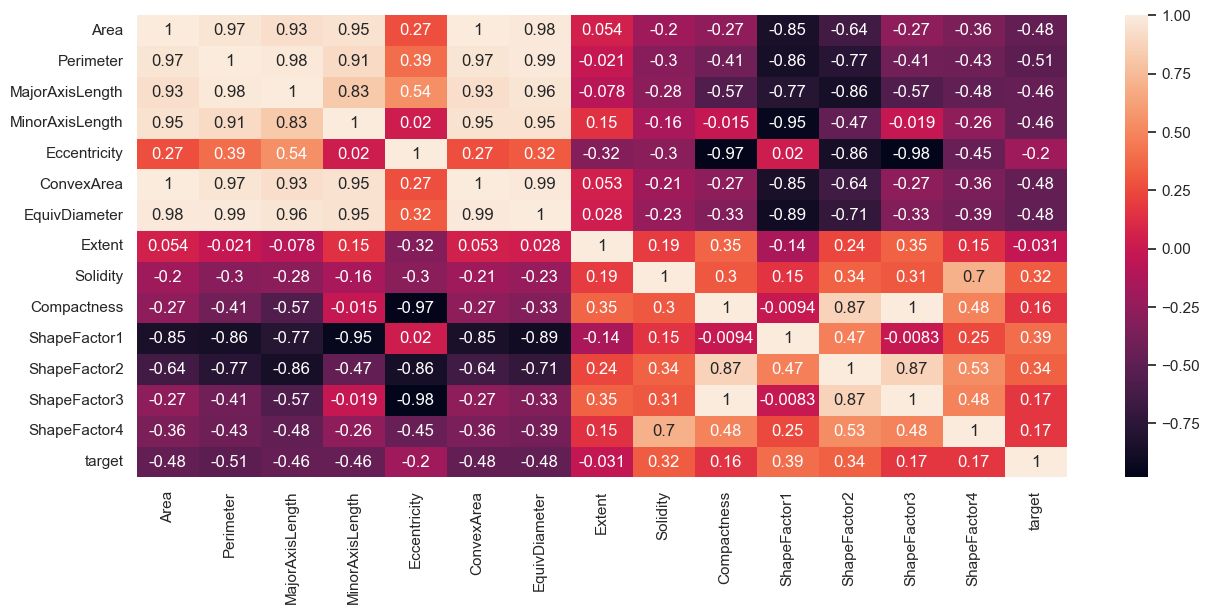

In [30]:
plt.figure(figsize=(15, 6))
sbn.heatmap(df_copy.corr(numeric_only=True), annot=True)

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

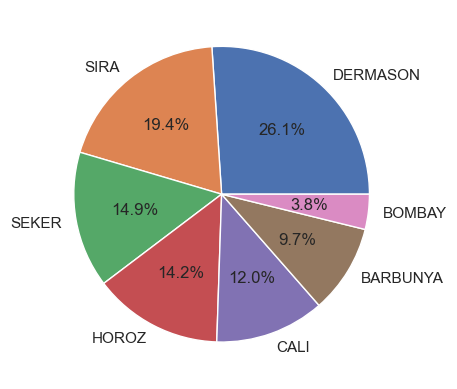

In [31]:
plt.figure()
count_class = df_copy["Class"].value_counts()
plt.pie(count_class.values, labels=count_class.index, autopct='%1.1f%%')
df_copy["Class"].value_counts()

Vemos un desbalance en el dataset, donde la clase *SIRA* y *DERMASON* representan el 45.5% del dataset, es decir, casi la mitad. Mientras que la otra mitad está dividida entre cuatro clases.

En base a esto, podemos concluir que la métrica *Accuracy* no va a ser la mejor para medir el funcionamiento del modelo, sino que necesitaremos incluir la métrica *F1-Score*. Vamos a tratar de obtener una relación entre estas dos métricas

## Calcular Aspect Ratio (K) y Roundness (R)

In [32]:
df_copy["Aspect Ratio"] = df_copy["MajorAxisLength"] / df_copy["MinorAxisLength"]

In [33]:
def calc_roundness(fila):
    return (4 * math.pi * fila["Area"]) / (fila["Perimeter"] ** 2)
df_copy["Roundness"] = df_copy.apply(calc_roundness, axis=1)

## Creación del modelo

In [34]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
import tensorflow as tf
from sklearn.model_selection import train_test_split
import optuna
import os
import random

def set_seeds(seed):  #Setear seed para obtener siempre los mismos resultados
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    keras.utils.set_random_seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
set_seeds(72)

In [35]:
## Dividir dataset
#Se elimina la columna target
dfx = df_copy.drop(columns=["target", "Class"])
dfy = df_copy["target"].astype(np.float32)
X, X_test, y, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=72)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=72)
y_train = keras.utils.to_categorical(y_train)
y_valid = keras.utils.to_categorical(y_valid)
y_test = keras.utils.to_categorical(y_test)
num_clases = len(df_copy["Class"].unique())

#### Fine-Tunning
Utilizamos la librería optuna para encontrar los mejores parámetros para el modelo.
Para ello necesitamos una función en donde vamos a definir nuestros posibles parámetros y luego retornamos el Accuracy y F1-Score por lo explicado anteriormente. El propósito es maximizar ambas métricas modelo que más aciertos tenga, pero que también pueda distinguir entre las diferentes clases.

In [36]:
def objetivo_clasificacion(trial: optuna.trial.Trial):
    num_capas = trial.suggest_int("num_capas", 1, 5)
    model = Sequential()
    model.add(Input(shape=(len(X_train.columns), )))
    for i in range(num_capas):
        num_conexiones = trial.suggest_int(f"n_por_capas_{i}", 300, 1000)
        model.add(Dense(num_conexiones, activation="relu"))
    model.add(Dense(num_clases, activation="softmax"))
    model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=[keras.metrics.Accuracy(name="acc"), keras.metrics.F1Score(name="f1", average="weighted")])
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=32)
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1:]

En F1Score utilizamos **average="weighted"** ya que eso da más peso a las clases minoritarias

In [37]:
estudio_reg = optuna.create_study(directions=["maximize", "maximize"])
estudio_reg.optimize(objetivo_clasificacion, n_trials=15, show_progress_bar=False)

[I 2024-05-06 23:00:30,290] A new study created in memory with name: no-name-7564071f-9442-4fe6-a075-ddb79b739a17


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 790.6069 - acc: 0.7043 - f1: 0.1722 - val_loss: 565.8032 - val_acc: 0.6440 - val_f1: 0.1104
Epoch 2/10
256/256 [==============================] - 0s 1ms/step - loss: 449.5176 - acc: 0.6990 - f1: 0.2246 - val_loss: 496.4057 - val_acc: 0.7818 - val_f1: 0.2142
Epoch 3/10
256/256 [==============================] - 0s 2ms/step - loss: 307.5169 - acc: 0.6956 - f1: 0.2519 - val_loss: 128.7671 - val_acc: 0.6571 - val_f1: 0.1608
Epoch 4/10
256/256 [==============================] - 0s 1ms/step - loss: 231.4905 - acc: 0.7039 - f1: 0.2854 - val_loss: 171.6633 - val_acc: 0.7010 - val_f1: 0.2196
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 226.4801 - acc: 0.7122 - f1: 0.3117 - val_loss: 115.7300 - val_acc: 0.6769 - val_f1: 0.3388
Epoch 6/10
256/256 [==============================] - 0s 1ms/step - loss: 171.2339 - acc: 0.7121 - f1: 0.3445 - val_loss: 360.5447 - val_acc: 0.7017 - val_f1: 0.2178
Epoc

[I 2024-05-06 23:00:35,083] Trial 0 finished with values: [0.759981095790863, 0.4158792495727539] and parameters: {'num_capas': 1, 'n_por_capas_0': 808}. 


Epoch 1/10
256/256 [==============================] - 2s 2ms/step - loss: 679.8189 - acc: 0.3721 - f1: 0.1568 - val_loss: 29.3966 - val_acc: 0.0657 - val_f1: 0.0287
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 4.8526 - acc: 0.0031 - f1: 0.1472 - val_loss: 1.8390 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 3/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8344 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8345 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8330 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8340 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8329 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8339 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8329 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8344 - val_acc: 0.0000e+00 - val_

[I 2024-05-06 23:00:40,997] Trial 1 finished with values: [0.0, 0.10406430065631866] and parameters: {'num_capas': 3, 'n_por_capas_0': 381, 'n_por_capas_1': 933, 'n_por_capas_2': 443}. 


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 1746.0687 - acc: 0.7314 - f1: 0.1600 - val_loss: 882.9310 - val_acc: 0.7260 - val_f1: 0.0339
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 400.7294 - acc: 0.6568 - f1: 0.1898 - val_loss: 234.2706 - val_acc: 0.5747 - val_f1: 0.1469
Epoch 3/10
256/256 [==============================] - 0s 2ms/step - loss: 175.7809 - acc: 0.5895 - f1: 0.2283 - val_loss: 208.0523 - val_acc: 0.6908 - val_f1: 0.1490
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 92.5028 - acc: 0.5222 - f1: 0.2923 - val_loss: 102.7367 - val_acc: 0.4887 - val_f1: 0.2576
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 52.5314 - acc: 0.4437 - f1: 0.3687 - val_loss: 67.2722 - val_acc: 0.5574 - val_f1: 0.0764
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 45.1199 - acc: 0.4618 - f1: 0.3787 - val_loss: 31.7962 - val_acc: 0.4047 - val_f1: 0.1911
Epoch 7/

[I 2024-05-06 23:00:46,237] Trial 2 finished with values: [0.3492996096611023, 0.5514019131660461] and parameters: {'num_capas': 2, 'n_por_capas_0': 423, 'n_por_capas_1': 619}. 


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 1417.5903 - acc: 0.7269 - f1: 0.1602 - val_loss: 688.2703 - val_acc: 0.7740 - val_f1: 0.0723
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 345.1263 - acc: 0.6643 - f1: 0.1936 - val_loss: 477.4875 - val_acc: 0.7076 - val_f1: 0.0157
Epoch 3/10
256/256 [==============================] - 0s 2ms/step - loss: 234.7161 - acc: 0.6237 - f1: 0.2173 - val_loss: 87.6532 - val_acc: 0.4166 - val_f1: 0.2265
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 78.0100 - acc: 0.4843 - f1: 0.3059 - val_loss: 55.6364 - val_acc: 0.4204 - val_f1: 0.2174
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 61.5687 - acc: 0.4732 - f1: 0.3207 - val_loss: 41.5322 - val_acc: 0.4273 - val_f1: 0.2667
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 43.0153 - acc: 0.4343 - f1: 0.3787 - val_loss: 36.1635 - val_acc: 0.3556 - val_f1: 0.2257
Epoch 7/10

[I 2024-05-06 23:00:51,498] Trial 3 finished with values: [0.5385866165161133, 0.30475378036499023] and parameters: {'num_capas': 2, 'n_por_capas_0': 840, 'n_por_capas_1': 318}. 


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 1597.3840 - acc: 0.7214 - f1: 0.1571 - val_loss: 759.6906 - val_acc: 0.6578 - val_f1: 0.0317
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 292.8598 - acc: 0.6038 - f1: 0.1718 - val_loss: 118.7458 - val_acc: 0.5405 - val_f1: 0.0340
Epoch 3/10
256/256 [==============================] - 0s 2ms/step - loss: 89.5382 - acc: 0.4283 - f1: 0.2296 - val_loss: 50.5274 - val_acc: 0.2763 - val_f1: 0.1621
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 48.9535 - acc: 0.3151 - f1: 0.2638 - val_loss: 96.3586 - val_acc: 0.5457 - val_f1: 0.1196
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 36.9927 - acc: 0.2772 - f1: 0.2989 - val_loss: 18.6565 - val_acc: 0.1785 - val_f1: 0.0983
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 28.5342 - acc: 0.2571 - f1: 0.3371 - val_loss: 28.3206 - val_acc: 0.3934 - val_f1: 0.2027
Epoch 7/10


[I 2024-05-06 23:00:56,715] Trial 4 finished with values: [0.14317192137241364, 0.36132606863975525] and parameters: {'num_capas': 2, 'n_por_capas_0': 757, 'n_por_capas_1': 631}. 


Epoch 1/10
256/256 [==============================] - 2s 3ms/step - loss: 163.7050 - acc: 0.1015 - f1: 0.1500 - val_loss: 1.8336 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 2/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8345 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8343 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 3/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8349 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8364 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 4/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8347 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8346 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 5/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8347 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8352 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 6/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8345 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8370 - val_acc: 0.0000e+00

[I 2024-05-06 23:01:03,901] Trial 5 finished with values: [0.0, 0.10406430065631866] and parameters: {'num_capas': 5, 'n_por_capas_0': 471, 'n_por_capas_1': 330, 'n_por_capas_2': 724, 'n_por_capas_3': 575, 'n_por_capas_4': 772}. 


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 1470.4061 - acc: 0.7205 - f1: 0.1577 - val_loss: 647.8186 - val_acc: 0.6949 - val_f1: 0.0287
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 412.7954 - acc: 0.6751 - f1: 0.1794 - val_loss: 238.9132 - val_acc: 0.7026 - val_f1: 0.1127
Epoch 3/10
256/256 [==============================] - 0s 2ms/step - loss: 155.9119 - acc: 0.5561 - f1: 0.2194 - val_loss: 114.1781 - val_acc: 0.3986 - val_f1: 0.0772
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 86.3557 - acc: 0.4882 - f1: 0.2777 - val_loss: 44.3808 - val_acc: 0.3880 - val_f1: 0.2646
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 70.3194 - acc: 0.4530 - f1: 0.3180 - val_loss: 23.7649 - val_acc: 0.3465 - val_f1: 0.2882
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 37.1802 - acc: 0.3803 - f1: 0.3837 - val_loss: 28.9726 - val_acc: 0.3963 - val_f1: 0.3822
Epoch 7/1

[I 2024-05-06 23:01:09,119] Trial 6 finished with values: [0.3008761405944824, 0.4055596590042114] and parameters: {'num_capas': 2, 'n_por_capas_0': 489, 'n_por_capas_1': 508}. 


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 824.4248 - acc: 0.7113 - f1: 0.1740 - val_loss: 482.5828 - val_acc: 0.6962 - val_f1: 0.0288
Epoch 2/10
256/256 [==============================] - 0s 1ms/step - loss: 460.8853 - acc: 0.6985 - f1: 0.2048 - val_loss: 484.5431 - val_acc: 0.7710 - val_f1: 0.1420
Epoch 3/10
256/256 [==============================] - 0s 1ms/step - loss: 284.4706 - acc: 0.6912 - f1: 0.2643 - val_loss: 394.1382 - val_acc: 0.7537 - val_f1: 0.0398
Epoch 4/10
256/256 [==============================] - 0s 1ms/step - loss: 277.8500 - acc: 0.7125 - f1: 0.2857 - val_loss: 243.3513 - val_acc: 0.6408 - val_f1: 0.3169
Epoch 5/10
256/256 [==============================] - 0s 1ms/step - loss: 173.9491 - acc: 0.6998 - f1: 0.3256 - val_loss: 176.3287 - val_acc: 0.7263 - val_f1: 0.1314
Epoch 6/10
256/256 [==============================] - 0s 1ms/step - loss: 144.5615 - acc: 0.7056 - f1: 0.3575 - val_loss: 134.7461 - val_acc: 0.6878 - val_f1: 0.2316
Epoc

[I 2024-05-06 23:01:13,715] Trial 7 finished with values: [0.7031110525131226, 0.21709191799163818] and parameters: {'num_capas': 1, 'n_por_capas_0': 886}. 


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 453.4398 - acc: 0.1856 - f1: 0.1635 - val_loss: 1.8418 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8344 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8339 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 3/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8332 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8348 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8333 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8341 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8333 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8342 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8334 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8351 - val_acc: 0.0000e+00

[I 2024-05-06 23:01:19,551] Trial 8 finished with values: [0.0, 0.10406430065631866] and parameters: {'num_capas': 3, 'n_por_capas_0': 406, 'n_por_capas_1': 577, 'n_por_capas_2': 907}. 


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 1581.6045 - acc: 0.7028 - f1: 0.1586 - val_loss: 373.3825 - val_acc: 0.5110 - val_f1: 0.0160
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 194.0539 - acc: 0.5576 - f1: 0.1918 - val_loss: 160.5158 - val_acc: 0.4886 - val_f1: 0.0558
Epoch 3/10
256/256 [==============================] - 0s 2ms/step - loss: 68.3339 - acc: 0.3258 - f1: 0.2380 - val_loss: 26.1647 - val_acc: 0.1932 - val_f1: 0.3256
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 25.3368 - acc: 0.1675 - f1: 0.3427 - val_loss: 8.6362 - val_acc: 0.0947 - val_f1: 0.3200
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 19.1076 - acc: 0.1567 - f1: 0.3672 - val_loss: 17.0907 - val_acc: 0.1405 - val_f1: 0.2750
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 10.5849 - acc: 0.1497 - f1: 0.4387 - val_loss: 7.7843 - val_acc: 0.1123 - val_f1: 0.4753
Epoch 7/10
25

[I 2024-05-06 23:01:24,835] Trial 9 finished with values: [0.16609831154346466, 0.3963449001312256] and parameters: {'num_capas': 2, 'n_por_capas_0': 997, 'n_por_capas_1': 772}. 


Epoch 1/10
256/256 [==============================] - 2s 2ms/step - loss: 266.6115 - acc: 0.1153 - f1: 0.1469 - val_loss: 1.8343 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 2/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8338 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8344 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 3/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8342 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8355 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 4/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8341 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8350 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 5/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8343 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8351 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 6/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8342 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8364 - val_acc: 0.0000e+00

[I 2024-05-06 23:01:31,704] Trial 10 finished with values: [0.0, 0.10406430065631866] and parameters: {'num_capas': 4, 'n_por_capas_0': 626, 'n_por_capas_1': 414, 'n_por_capas_2': 907, 'n_por_capas_3': 709}. 


Epoch 1/10
256/256 [==============================] - 2s 3ms/step - loss: 219.2981 - acc: 0.1516 - f1: 0.1721 - val_loss: 1.8396 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 2/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8344 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8345 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 3/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8344 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8359 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 4/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8340 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8348 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 5/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8343 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8348 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 6/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8341 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8367 - val_acc: 0.0000e+00

[I 2024-05-06 23:01:39,036] Trial 11 finished with values: [0.0, 0.10406430065631866] and parameters: {'num_capas': 5, 'n_por_capas_0': 624, 'n_por_capas_1': 653, 'n_por_capas_2': 784, 'n_por_capas_3': 390, 'n_por_capas_4': 812}. 


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 848.0662 - acc: 0.6988 - f1: 0.1717 - val_loss: 670.1323 - val_acc: 0.7287 - val_f1: 0.0287
Epoch 2/10
256/256 [==============================] - 0s 1ms/step - loss: 529.9081 - acc: 0.7029 - f1: 0.1864 - val_loss: 295.9952 - val_acc: 0.5236 - val_f1: 0.0657
Epoch 3/10
256/256 [==============================] - 0s 1ms/step - loss: 367.5099 - acc: 0.7034 - f1: 0.2393 - val_loss: 200.3772 - val_acc: 0.7279 - val_f1: 0.4346
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 265.0705 - acc: 0.6990 - f1: 0.2989 - val_loss: 248.2830 - val_acc: 0.7532 - val_f1: 0.2240
Epoch 5/10
256/256 [==============================] - 0s 1ms/step - loss: 230.3800 - acc: 0.7170 - f1: 0.3081 - val_loss: 201.5049 - val_acc: 0.7595 - val_f1: 0.2263
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 195.5843 - acc: 0.7111 - f1: 0.3358 - val_loss: 333.6080 - val_acc: 0.7383 - val_f1: 0.1660
Epoc

[I 2024-05-06 23:01:43,701] Trial 12 finished with values: [0.7786055207252502, 0.30378368496894836] and parameters: {'num_capas': 1, 'n_por_capas_0': 641}. 


Epoch 1/10
256/256 [==============================] - 2s 2ms/step - loss: 353.2285 - acc: 0.1736 - f1: 0.1630 - val_loss: 1.8343 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 2/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8336 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8345 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 3/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8341 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8359 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 1.8340 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8345 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 5/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8342 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8349 - val_acc: 0.0000e+00 - val_f1: 0.1063
Epoch 6/10
256/256 [==============================] - 1s 2ms/step - loss: 1.8341 - acc: 0.0000e+00 - f1: 0.1094 - val_loss: 1.8364 - val_acc: 0.0000e+00

[I 2024-05-06 23:01:50,195] Trial 13 finished with values: [0.0, 0.10406430065631866] and parameters: {'num_capas': 4, 'n_por_capas_0': 412, 'n_por_capas_1': 577, 'n_por_capas_2': 804, 'n_por_capas_3': 988}. 


Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 1464.9884 - acc: 0.7234 - f1: 0.1607 - val_loss: 838.3592 - val_acc: 0.7740 - val_f1: 0.0723
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 294.2986 - acc: 0.6186 - f1: 0.1986 - val_loss: 72.0021 - val_acc: 0.3570 - val_f1: 0.2456
Epoch 3/10
256/256 [==============================] - 0s 2ms/step - loss: 95.0281 - acc: 0.4604 - f1: 0.2574 - val_loss: 77.9600 - val_acc: 0.5004 - val_f1: 0.2148
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 66.0476 - acc: 0.4089 - f1: 0.3083 - val_loss: 39.5994 - val_acc: 0.3598 - val_f1: 0.3061
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 28.9019 - acc: 0.2653 - f1: 0.3449 - val_loss: 26.6237 - val_acc: 0.3408 - val_f1: 0.3693
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 23.0393 - acc: 0.2577 - f1: 0.3729 - val_loss: 24.3049 - val_acc: 0.2672 - val_f1: 0.3142
Epoch 7/10
2

[I 2024-05-06 23:01:55,515] Trial 14 finished with values: [0.2352447360754013, 0.38544461131095886] and parameters: {'num_capas': 2, 'n_por_capas_0': 780, 'n_por_capas_1': 668}. 


In [38]:
for trial in estudio_reg.best_trials:
    print(trial.params, trial.values)

{'num_capas': 1, 'n_por_capas_0': 808} [0.759981095790863, 0.4158792495727539]
{'num_capas': 2, 'n_por_capas_0': 423, 'n_por_capas_1': 619} [0.3492996096611023, 0.5514019131660461]
{'num_capas': 1, 'n_por_capas_0': 641} [0.7786055207252502, 0.30378368496894836]


El mejor modelo encontrado es el que tiene los parámetros:
* **Número de capas**: 1
* **Neuronas por capas**: 883

Esto nos da un accuracy de 0.79 y un F1-Score de 0.41

#### Creación del modelo

In [39]:
model = Sequential()
model.add(Input(shape=(len(X_train.columns), )))
model.add(Dense(units=883, activation="relu"))
model.add(Dense(num_clases, activation="softmax"))
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=[keras.metrics.Accuracy(name="acc"), keras.metrics.F1Score(name="f1", average="weighted")])
model_history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=15, batch_size=32)
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/15
256/256 [==============================] - 1s 2ms/step - loss: 878.0161 - acc: 0.7170 - f1: 0.1821 - val_loss: 606.0305 - val_acc: 0.7066 - val_f1: 0.0569
Epoch 2/15
256/256 [==============================] - 0s 1ms/step - loss: 483.6107 - acc: 0.7080 - f1: 0.2042 - val_loss: 540.5659 - val_acc: 0.6982 - val_f1: 0.0157
Epoch 3/15
256/256 [==============================] - 0s 2ms/step - loss: 319.1852 - acc: 0.7051 - f1: 0.2552 - val_loss: 416.5444 - val_acc: 0.7018 - val_f1: 0.1836
Epoch 4/15
256/256 [==============================] - 0s 1ms/step - loss: 310.4452 - acc: 0.7159 - f1: 0.2772 - val_loss: 275.4945 - val_acc: 0.7393 - val_f1: 0.2482
Epoch 5/15
256/256 [==============================] - 0s 2ms/step - loss: 235.2723 - acc: 0.7125 - f1: 0.3157 - val_loss: 205.6155 - val_acc: 0.7698 - val_f1: 0.1666
Epoch 6/15
256/256 [==============================] - 0s 1ms/step - loss: 169.0837 - acc: 0.7104 - f1: 0.3510 - val_loss: 240.6907 - val_acc: 0.7063 - val_f1: 0.2827
Epoc

In [40]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 883)               15011     
                                                                 
 dense_95 (Dense)            (None, 7)                 6188      
                                                                 
Total params: 21199 (82.81 KB)
Trainable params: 21199 (82.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
print("Pérdida", score[0])
print("Accuracy", score[1])
print("F1", score[2])

Pérdida 155.5730743408203
Accuracy 0.7780284285545349
F1 0.32661983370780945


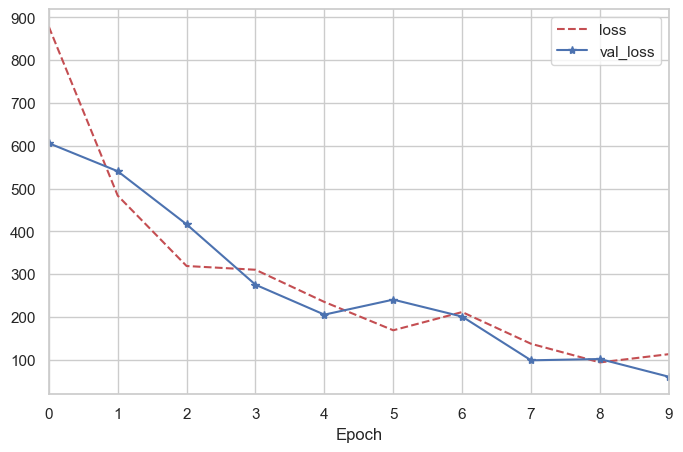

In [42]:
pd.DataFrame({"loss": model_history.history["loss"], "val_loss": model_history.history["val_loss"]}).plot(figsize=(8, 5), xlim=[0, 9],  grid=True, xlabel="Epoch", style=["r--", "b-*"])
plt.show()

En el gráfico superior podemos apreciar la evoluación de la pérdida a través de las iteraciones. Vemos que la pérdida de validación es menor a la de entrenamiento

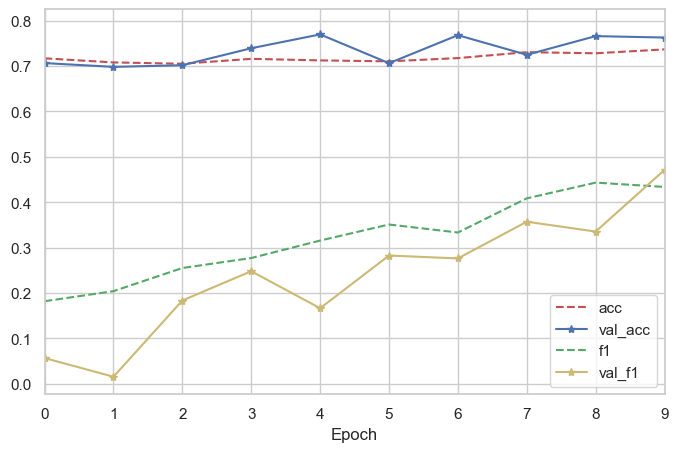

In [43]:
pd.DataFrame({
    "acc": model_history.history["acc"],
    "val_acc": model_history.history["val_acc"],
    "f1": model_history.history["f1"],
    "val_f1": model_history.history["val_f1"]
}).plot(figsize=(8, 5), xlim=[0, 9],  grid=True, xlabel="Epoch", style=["r--", "b-*", "g--", "y-*"])
plt.show()

En el gráfico vemos la evolución de nuestras métricas de rendimiento. Vemos que, al finalizar las iteraciones, el f1 de validation es superior al de training y el accuracy de validation está sólo un poco debajo del de training

### Conclusión
Este trabajo práctico ha demostrado la eficacia del uso de redes neuronales para clasificar diferentes variedades de frijoles secos basándose en características morfológicas. Al agregar nuevas características calculadas como el índice de aspecto y la redondez al conjunto de datos, hemos mejorado la capacidad predictiva del modelo de clasificación. Estas nuevas características proporcionan una mayor comprensión de la forma y estructura de los granos de frijol, lo que contribuye a una clasificación más precisa. El modelo entrenado ha demostrado ser capaz de distinguir con una precisión aceptable entre siete variedades de frijoles secos, lo que sugiere su potencial aplicación en la industria agrícola para la clasificación automatizada de cosechas. El principal problema que encontramos en este dataset es que se encontraba desbalanceado, sin embargo, pudimos solucionarlo realizando dos métricas diferentes: Accuracy y F1-Score.

# Ejercicio 3
## Descripción:
En este problema, se proporciona un conjunto de datos que contiene imágenes de escenas naturales de todo el mundo. El objetivo es construir un modelo de clasificación utilizando redes neuronales convolucionales (CNN) para clasificar estas imágenes en una de las seis categorías predefinidas.

Dataset:
El dataset proporcionado contiene alrededor de 25,000 imágenes de tamaño 150x150, distribuidas en seis categorías:
* buildings
* forest
* glacier
* mountain
* sea
* street
Las imágenes están divididas en tres conjuntos:
* Train: Alrededor de 14,000 imágenes para entrenamiento.
* Test: Alrededor de 3,000 imágenes para evaluación del modelo.
* Prediction: Alrededor de 7,000 imágenes para predicción final.

## Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir y comparar el rendimiento de distintos modelos de clasificación de imágenes utilizando redes neuronales convolucionales y densas que puedan clasificar con precisión las imágenes de escenas naturales en una de las seis categorías mencionadas anteriormente.
Los modelos a diseñar son:
* Modelo con capas densas.
* Modelo con capas convolucionales y densas.
* Modelo que incluya bloques residuales identidad:
* Modelo que utilice como backbone alguna de las arquitecturas disponibles en TensorFlow (transfer learning): https://www.tensorflow.org/api_docs/python/tf/keras/applications

Se debe entrenar y evaluar cada modelo utilizando técnicas adecuadas de validación y métricas de evaluación de clasificación.



## Configuración

In [1]:
!pip install gdown

In [2]:
import gdown
import zipfile
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Input, Add
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report, confusion_matrix

Descargamos el set de datos

In [3]:
gdown.download('https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ')

with zipfile.ZipFile('TP1-3-natural-scenes.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-3')

Downloading...
From (original): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ
From (redirected): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ&confirm=t&uuid=be1c698b-1303-4003-90fc-1945738c1916
To: /content/TP1-3-natural-scenes.zip
100%|██████████| 363M/363M [00:14<00:00, 24.8MB/s]


## Análisis del set de datos

Se definen los directorios de entrenamiento, validación y prueba del modelo

In [4]:
train_dir = 'TP1-3/seg_train/seg_train'
val_dir = 'TP1-3/seg_test/seg_test'
test_dir = 'TP1-3/seg_pred'

Visualizamos la cantidad de datos de cada clase para entrenamiento y test

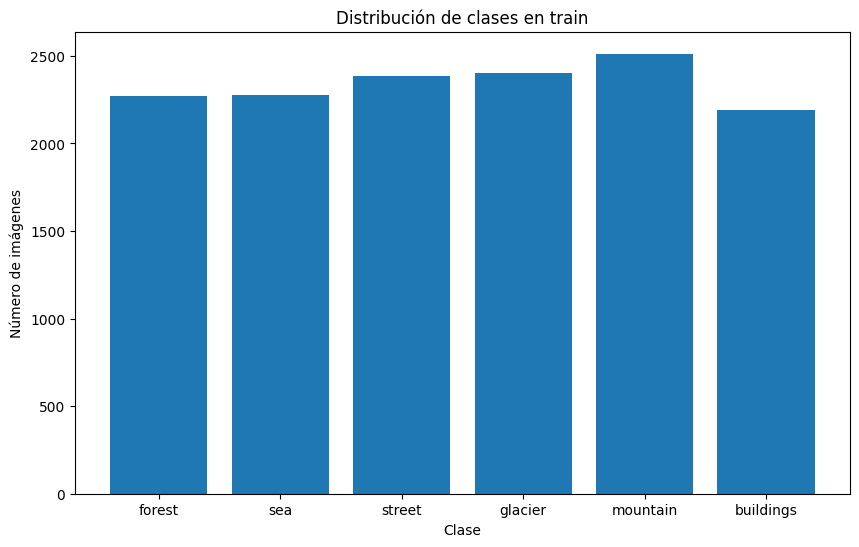

In [5]:
classes = os.listdir(train_dir)

num_images_per_class = {}
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_path))
    num_images_per_class[class_name] = num_images

plt.figure(figsize=(10, 6))
plt.bar(num_images_per_class.keys(), num_images_per_class.values())
plt.title('Distribución de clases en train')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.show()

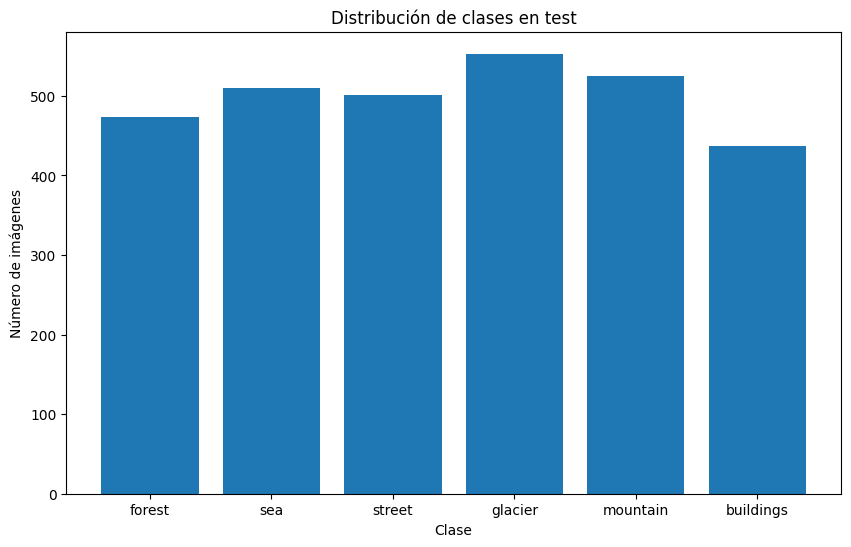

In [6]:
num_images_per_class = {}
for class_name in classes:
    class_path = os.path.join(val_dir, class_name)
    num_images = len(os.listdir(class_path))
    num_images_per_class[class_name] = num_images

plt.figure(figsize=(10, 6))
plt.bar(num_images_per_class.keys(), num_images_per_class.values())
plt.title('Distribución de clases en test')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.show()

Observamos algunos ejemplos de las clases que vamos a trabajar

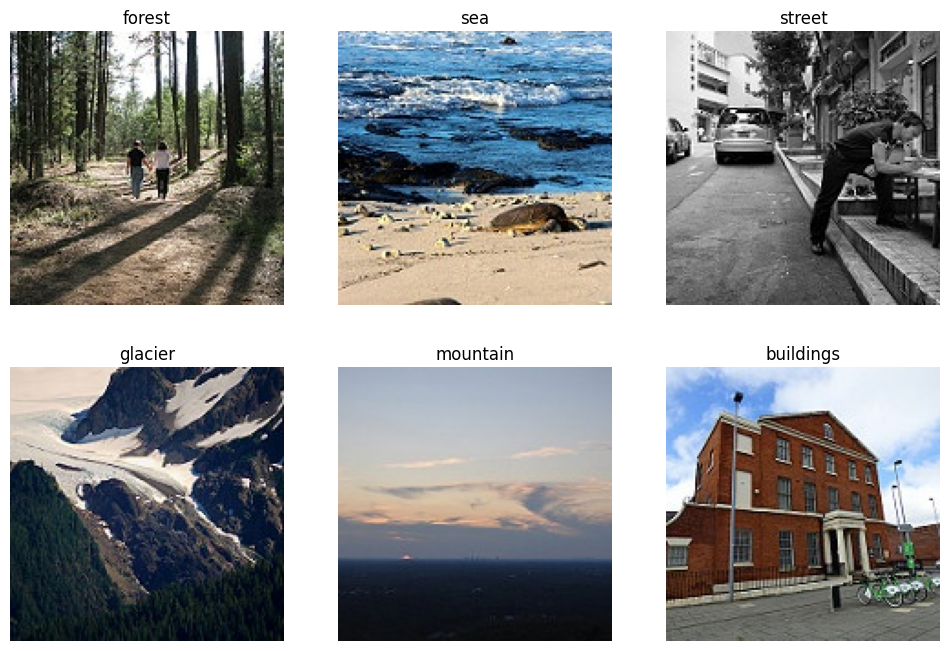

In [7]:
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(classes, start=1):
    class_path = os.path.join(train_dir, class_name)
    sample_image_path = os.path.join(class_path, os.listdir(class_path)[0])
    sample_image = load_img(sample_image_path, target_size=(150, 150))
    plt.subplot(2, 3, i)
    plt.imshow(sample_image)
    plt.title(class_name)
    plt.axis('off')
plt.show()

Por último unas estadísticas básicas para poder obtener una visión más general del set de datos

In [8]:
total_images = sum(num_images_per_class.values())
print("Número total de imágenes:", total_images)
print("Número de clases:", len(classes))
print("Número promedio de imágenes por clase:", np.mean(list(num_images_per_class.values())))
print("Tamaño promedio de las imágenes:", sample_image.size)

Número total de imágenes: 3000
Número de clases: 6
Número promedio de imágenes por clase: 500.0
Tamaño promedio de las imágenes: (150, 150)


## Creación de modelos

Definimos los set de datos que utilizaremos en los modelos

In [9]:
batch_size = 32
target_size = (150, 150)

# Generador de datos de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Generador de datos de validación
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Generador de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


### Modelos con capas densas

Definimos el modelo con capas densas

In [10]:
dense_model = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
dense_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 8648774 (32.99 MB)
Trainable params: 8648774 (32.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo

In [11]:
history_dense_model = dense_model.fit(train_generator, epochs=15, validation_data=val_generator)

Epoch 1/15
439/439 [==============================] - 90s 201ms/step - loss: 2.2826 - accuracy: 0.3953 - val_loss: 1.6066 - val_accuracy: 0.4607
Epoch 2/15
439/439 [==============================] - 89s 202ms/step - loss: 1.4951 - accuracy: 0.4585 - val_loss: 1.4552 - val_accuracy: 0.4993
Epoch 3/15
439/439 [==============================] - 87s 197ms/step - loss: 1.3922 - accuracy: 0.4769 - val_loss: 1.3640 - val_accuracy: 0.4913
Epoch 4/15
439/439 [==============================] - 87s 198ms/step - loss: 1.3086 - accuracy: 0.4998 - val_loss: 1.3926 - val_accuracy: 0.4503
Epoch 5/15
439/439 [==============================] - 88s 201ms/step - loss: 1.2722 - accuracy: 0.5131 - val_loss: 1.2420 - val_accuracy: 0.5317
Epoch 6/15
439/439 [==============================] - 86s 196ms/step - loss: 1.2394 - accuracy: 0.5232 - val_loss: 1.2209 - val_accuracy: 0.5307
Epoch 7/15
439/439 [==============================] - 86s 195ms/step - loss: 1.2241 - accuracy: 0.5245 - val_loss: 1.2425 - val_ac

Evaluamos al modelo

In [12]:
dense_loss, dense_accuracy = dense_model.evaluate(val_generator)
print("Dense Model Accuracy:", dense_accuracy)

94/94 [==============================] - 3s 32ms/step - loss: 1.2089 - accuracy: 0.5387
Dense Model Accuracy: 0.5386666655540466


Vemos como se comportó a lo largo del entrenamiento

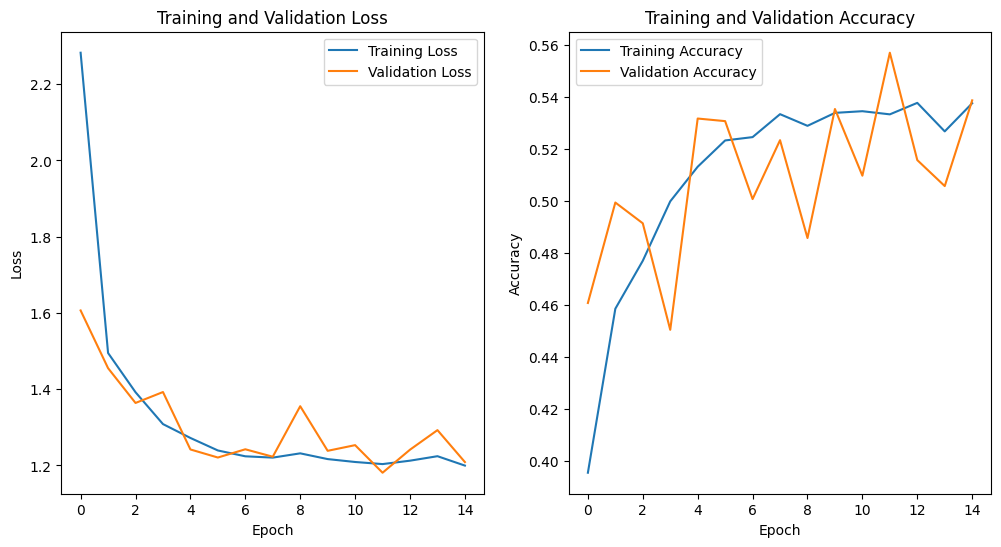

In [13]:
def see_history_model(history):
  train_loss = history.history['loss']
  train_accuracy = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(train_loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(train_accuracy, label='Training Accuracy')
  plt.plot(val_accuracy, label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

see_history_model(history_dense_model)

### Modelo con capas convolucionales y densas

Definimos el modelo con capas convolucionales y densas

In [14]:
conv_dense_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

conv_dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
conv_dense_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

Lo entrenamos

In [15]:
history_conv_dense_model = conv_dense_model.fit(train_generator, epochs=8, validation_data=val_generator)

Epoch 1/8
439/439 [==============================] - 101s 219ms/step - loss: 0.9539 - accuracy: 0.6414 - val_loss: 0.6431 - val_accuracy: 0.7620
Epoch 2/8
439/439 [==============================] - 92s 208ms/step - loss: 0.6630 - accuracy: 0.7583 - val_loss: 0.6820 - val_accuracy: 0.7580
Epoch 3/8
439/439 [==============================] - 92s 209ms/step - loss: 0.5604 - accuracy: 0.7966 - val_loss: 0.5963 - val_accuracy: 0.7940
Epoch 4/8
439/439 [==============================] - 92s 209ms/step - loss: 0.4940 - accuracy: 0.8189 - val_loss: 0.4527 - val_accuracy: 0.8377
Epoch 5/8
439/439 [==============================] - 92s 209ms/step - loss: 0.4567 - accuracy: 0.8360 - val_loss: 0.5983 - val_accuracy: 0.7947
Epoch 6/8
439/439 [==============================] - 92s 209ms/step - loss: 0.4081 - accuracy: 0.8529 - val_loss: 0.4484 - val_accuracy: 0.8473
Epoch 7/8
439/439 [==============================] - 92s 209ms/step - loss: 0.3793 - accuracy: 0.8650 - val_loss: 0.4068 - val_accuracy

Evaluamos el modelo

In [16]:
conv_dense_loss, conv_dense_accuracy = conv_dense_model.evaluate(val_generator)
print("Convolutional + Dense Model Accuracy:", conv_dense_accuracy)

94/94 [==============================] - 3s 32ms/step - loss: 0.4126 - accuracy: 0.8610
Convolutional + Dense Model Accuracy: 0.8610000014305115


Vemos como se comportó a lo largo del entrenamiento

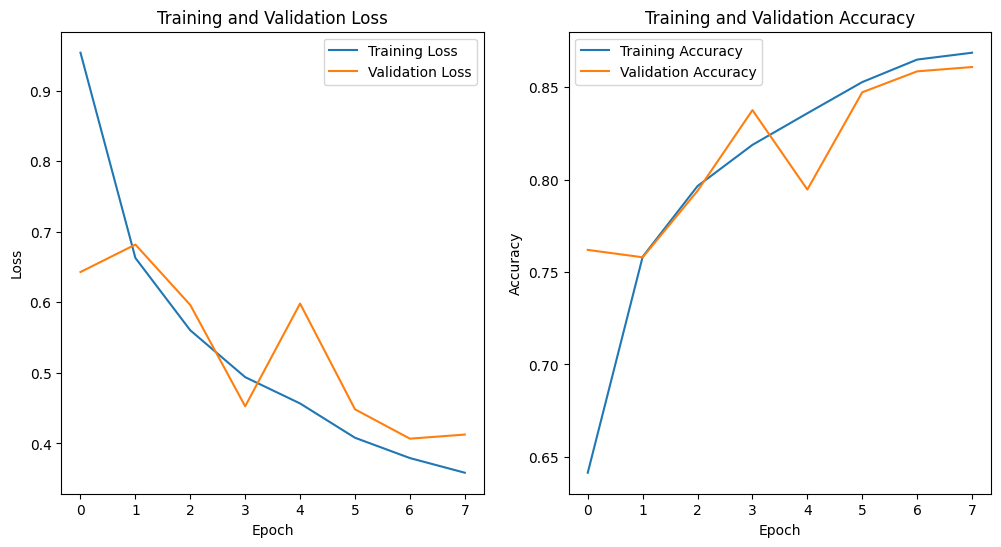

In [17]:
see_history_model(history_conv_dense_model)

### Modelo residual

Definimos el modelo residual

In [18]:
def residual_block(x, filters, kernel_size):
    y = Conv2D(filters, kernel_size, padding='same', activation='relu')(x)
    y = BatchNormalization()(y)
    y = Conv2D(filters, kernel_size, padding='same', activation='linear')(y)
    y = BatchNormalization()(y)

    if x.shape[-1] != filters:
        x = Conv2D(filters, (1, 1), padding='same')(x)

    y = Add()([y, x])
    y = tf.keras.layers.Activation('relu')(y)
    return y

input_layer = Input(shape=(150, 150, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(2, 2)(x)
x = residual_block(x, 32, (3, 3))
x = MaxPooling2D(2, 2)(x)
x = residual_block(x, 64, (3, 3))
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(6, activation='softmax')(x)

residual_model = Model(inputs=input_layer, outputs=output_layer)
residual_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
residual_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 148, 148, 32)         896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 74, 74, 32)           9248      ['max_pooling2d_3[0][0]'] 

Lo entrenamos

In [19]:
history_residual_model = residual_model.fit(train_generator, epochs=8, validation_data=val_generator)

Epoch 1/8
439/439 [==============================] - 99s 213ms/step - loss: 1.1400 - accuracy: 0.6345 - val_loss: 0.8828 - val_accuracy: 0.6700
Epoch 2/8
439/439 [==============================] - 94s 214ms/step - loss: 0.6803 - accuracy: 0.7526 - val_loss: 0.7436 - val_accuracy: 0.7130
Epoch 3/8
439/439 [==============================] - 93s 212ms/step - loss: 0.5740 - accuracy: 0.7932 - val_loss: 0.7107 - val_accuracy: 0.7493
Epoch 4/8
439/439 [==============================] - 94s 213ms/step - loss: 0.5158 - accuracy: 0.8171 - val_loss: 0.6538 - val_accuracy: 0.7593
Epoch 5/8
439/439 [==============================] - 94s 215ms/step - loss: 0.4654 - accuracy: 0.8300 - val_loss: 0.6170 - val_accuracy: 0.7713
Epoch 6/8
439/439 [==============================] - 94s 214ms/step - loss: 0.4454 - accuracy: 0.8426 - val_loss: 0.7645 - val_accuracy: 0.7017
Epoch 7/8
439/439 [==============================] - 92s 210ms/step - loss: 0.4135 - accuracy: 0.8513 - val_loss: 0.5310 - val_accuracy:

Evaluamos el modelo

In [20]:
residual_loss, residual_accuracy = residual_model.evaluate(val_generator)
print("Residual Model Accuracy:", residual_accuracy)

94/94 [==============================] - 3s 33ms/step - loss: 0.6613 - accuracy: 0.7667
Residual Model Accuracy: 0.7666666507720947


Vemos como se comportó el modelo a lo largo del entrenamiento

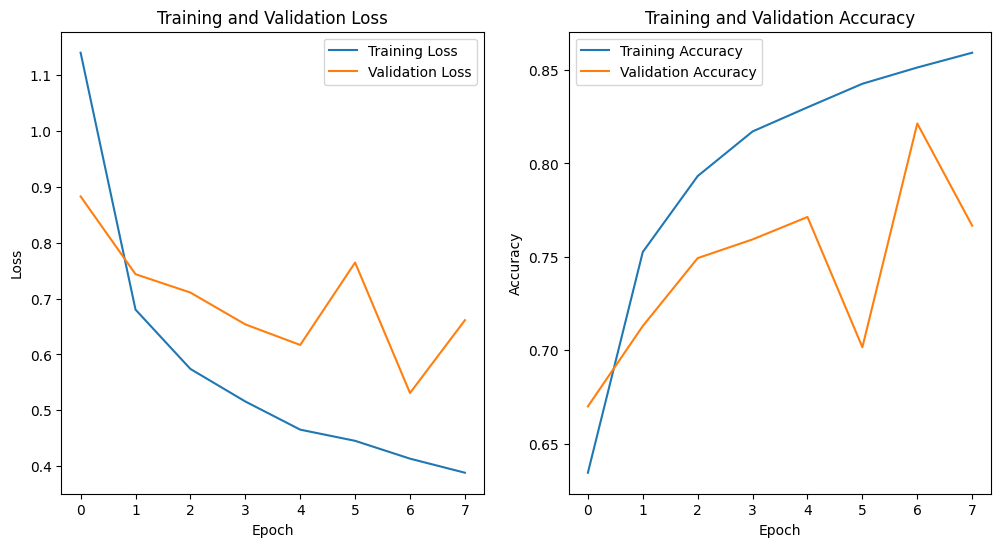

In [21]:
see_history_model(history_residual_model)

### Modelo con Transfer Learning

Definimos el modelo con Transfer Learning

En este caso elegimos a ResNet50 como Backbone

In [22]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 3s 0us/step


In [27]:
transfer_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

Lo entrenamos

In [ ]:
history_transfer_model = transfer_model.fit(train_generator, epochs=30, validation_data=val_generator)

Epoch 1/30
439/439 [==============================] - 112s 244ms/step - loss: 1.2893 - accuracy: 0.4732 - val_loss: 1.0325 - val_accuracy: 0.5800
Epoch 2/30
439/439 [==============================] - 97s 222ms/step - loss: 1.0198 - accuracy: 0.5889 - val_loss: 1.0313 - val_accuracy: 0.5720
Epoch 3/30
439/439 [==============================] - 95s 216ms/step - loss: 0.9721 - accuracy: 0.6107 - val_loss: 1.0020 - val_accuracy: 0.5960
Epoch 4/30
439/439 [==============================] - 95s 215ms/step - loss: 0.9140 - accuracy: 0.6365 - val_loss: 0.9431 - val_accuracy: 0.6263
Epoch 5/30
439/439 [==============================] - 96s 218ms/step - loss: 0.8827 - accuracy: 0.6542 - val_loss: 0.8577 - val_accuracy: 0.6660
Epoch 6/30
439/439 [==============================] - 96s 218ms/step - loss: 0.8765 - accuracy: 0.6526 - val_loss: 0.9230 - val_accuracy: 0.6300
Epoch 7/30
439/439 [==============================] - 95s 216ms/step - loss: 0.8496 - accuracy: 0.6627 - val_loss: 0.8629 - val_a

Evaluamos el modelo

In [ ]:
transfer_loss, transfer_accuracy = transfer_model.evaluate(val_generator)
print("Transfer Learning Model Accuracy:", transfer_accuracy)

94/94 [==============================] - 6s 59ms/step - loss: 0.7184 - accuracy: 0.7357
Transfer Learning Model Accuracy: 0.7356666922569275


Veamos como se comportó el modelo a lo largo del entrenamiento

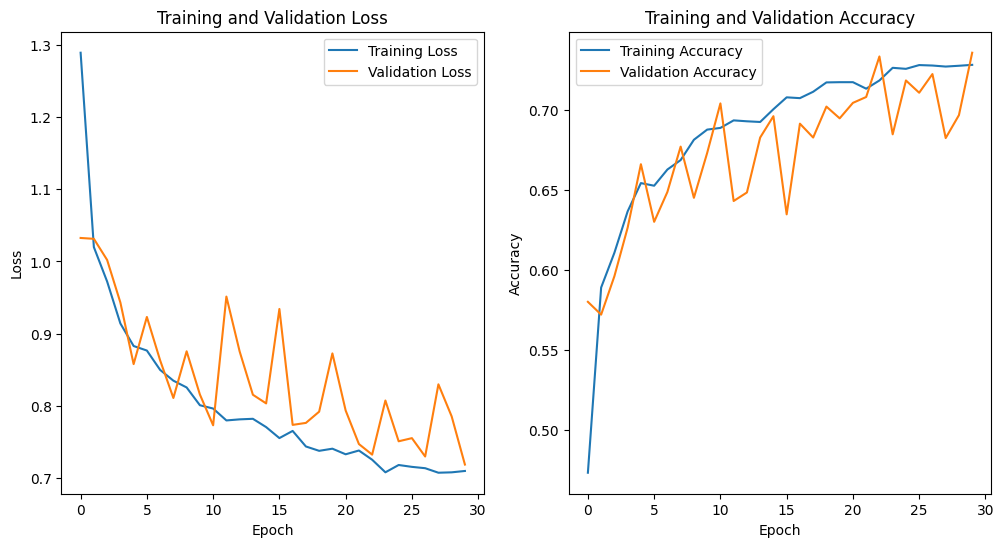

In [ ]:
see_history_model(history_transfer_model)

## Selección del mejor modelo y predicción

Comparando las métricas de los modelos nos queda de la siguiente manera

In [32]:
print("Comparación de accuracy")
print(f"Modelo de capas densas: {dense_accuracy}")
print(f"Modelo de capas densas y convolucionales: {conv_dense_accuracy}")
print(f"Modelo con bloques residuales de identidad: {residual_accuracy}")
print(f"Modelo de transfer learning: {transfer_accuracy}")

Comparación de accuracy
Modelo de capas densas: 0.5386666655540466
Modelo de capas densas y convolucionales: 0.8610000014305115
Modelo con bloques residuales de identidad: 0.7666666507720947
Modelo de transfer learning: 0.7356666922569275


Viendo las métricas que fueron obteniendo los modelos nos interesará quedarnos con el que más accuracy obtuvo, en este caso fue el modelo de capas densas y convolucionales obtuviendo un 0.86 de accuracy

In [33]:
# Predecir con el mejor modelo
predictions = conv_dense_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Guardar las predicciones en un archivo
np.savetxt("predictions.csv", predicted_classes, delimiter=",", fmt='%d')

# Guardar el mejor modelo
conv_dense_model.save("best_model.h5")

7301/7301 [==============================] - 23s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Conclusión

Una vez finalizado este ejercicios podemos concluir con que el modelo de capas densas y convolucionales es el mejor pero debemos detallar características importantes de todos los modelos testeados:

* Modelo de capas densas: Este modelo obtuvo el menor accuracy, alrededor del 0.53, Esto nos demuestra que las capas densas por sí solas pueden no ser suficientes para capturar las características más complejas que están presentes en las imágenes que le suministramos al modelo.
* Modelo de capas densas y convolucionales: Este modelo obtuvo un accuracy mucho mayor que el anterior siendo de 0.86. La incorporación de capas convolucionales nos permitió que el modelo pueda mejor las características más complejas de las imágenes.
* Modelo con bloques residuales de identidad: Este modelo obtuvo un accuracy del 0.77, lo que nos indica un rendimiento sólido pero no tan alto como el modelo con capas densas y convolucionales. Los bloques residuales ayudaron a abordar el problema de degradación del rendimiento que puede ocurrir en redes neuronales muy profundas.
* Modelo de transfer learning: Este modelo alcanzó un accuracy del 0.73, aunque este valor es menor en comparación con el modelo de capas densas y convolucionales, sigue siendo una opción viable, especialmente si tenemos en cuenta la facilidad de implementación y la capacidad de utilizar modelos pre-entrenados para tareas de clasificación de imágenes de una manera más fácil.

En general el modelo de capas densas y convolucionales supera a los otros modelos en términos de precisión aunque puede variar dependiendo de factores tales como el tiempo de entrenamiento requerrido, la complejidad del modelo y de los recursos que tengamos disponibles.
